In [272]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/ezgig/Desktop/udemy/linreg/Advertising.csv")

In [273]:
#index degerlerini veriymis gibi okumasini onlemek icin ilk sutunu siliyor
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


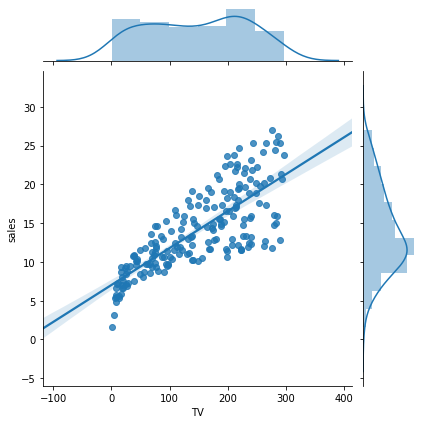

In [275]:
sns.jointplot(x = "TV", y = "sales", data= df, kind= "reg")

In [276]:
from sklearn.linear_model import LinearRegression

In [277]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [278]:
y = df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [279]:
reg = LinearRegression()

In [280]:
model = reg.fit(X , y)

In [281]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
str(model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [283]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [284]:
model.intercept_

array([7.03259355])

In [285]:
model.coef_

array([[0.04753664]])

In [286]:
#rkare
model.score(X,y)

0.611875050850071

In [287]:
#rkare
model.score(X,y)

0.611875050850071

## TAHMiN

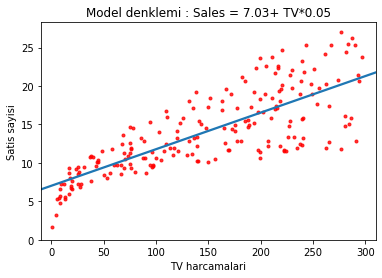

In [288]:
g = sns.regplot(df["TV"], df["sales"], ci=None , scatter_kws={'color':'r','s':9})
g.set_title("Model denklemi : Sales = 7.03+ TV*0.05")
g.set_ylabel("Satis sayisi")
g.set_xlabel("TV harcamalari")
plt.xlim(-10,310)
plt.ylim(bottom = 0);

In [289]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [290]:
model.predict([[165]])

array([[14.87613922]])

In [291]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [292]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [293]:
gercek_y = y[0:10]

In [294]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [295]:
hatalar = pd.concat([gercek_y ,tahmin_edilen_y], axis=1)

In [296]:
hatalar.columns = ["gercek_y" , "tahmin_edilen_y"]

In [297]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [298]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [299]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [300]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [301]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [302]:
np.mean(hatalar["hata_kareler"])

9.290350329638105

## multi linear regression

In [303]:
X = df.drop('sales', axis=1)

In [304]:
y = df[["sales"]]

In [305]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [306]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [307]:
#statmodels ile model kurmak

In [308]:
import statsmodels.api as sm

In [309]:
lm = sm.OLS(y,X)

In [310]:
model = lm.fit()

In [311]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 29 May 2020   Prob (F-statistic):                   2.43e-171
Time:                        18:00:15   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [313]:
model = lm.fit(X, y)

In [314]:
model.intercept_

array([2.93888937])

In [315]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

## TAHMIN
Sales = 2.94+TV*0.04+radio*0.19-newspaper*0.001

In [316]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [317]:
yeni_veri

,0,1,2
0,30,10,40


In [318]:
model.predict(yeni_veri)

array([[6.15562918]])

In [319]:
from sklearn.metrics import mean_squared_error

In [320]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [321]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [322]:
MSE = mean_squared_error(y, model.predict(X))

In [323]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

# MODEL TUNNING

In [324]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [325]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [326]:
#test set
from sklearn.model_selection import train_test_split

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state = 19)

In [328]:
y_test.head()

,sales
40,16.6
140,10.9
33,17.4
91,7.3
13,9.7


In [329]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [330]:
#egitim hatasi
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6820124302373272

In [331]:
#test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6426028177852539

In [332]:
#k katli cross validation
from sklearn.model_selection import cross_val_score

In [333]:
cross_val_score(model, X_train, y_train, cv=10,scoring= 'neg_mean_squared_error')

array([-2.93523919, -2.10408994, -3.39311815, -1.64665696, -7.42051064,
       -3.20802184, -3.99899616, -1.92801687, -3.31743354, -0.8065435 ])

In [334]:
#cv mse
np.mean(-cross_val_score(model, X_train, y_train, cv=10,scoring= 'neg_mean_squared_error'))

3.0758626771051474

In [335]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv=10,scoring= 'neg_mean_squared_error')))

1.7538137521142738

## RIDGE REGRESYON

In [336]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [337]:
df = pd.read_csv("C:/Users/ezgig/Desktop/udemy/linreg/Hitters.csv")

In [338]:
#eksik verileri kaldirma
df = df.dropna()

In [339]:
#kategorikleri dummy yaptik
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [340]:
#bagimli degisken
y = df["Salary"]

In [341]:
#kategorik degiskenleri dummy yapip tekrar ekledik
X_ = df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X = pd.concat([X_ ,dms[['League_N','Division_W','NewLeague_N']]], axis=1)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [343]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [344]:
df.shape

(263, 20)

In [345]:
ridge_model = Ridge(alpha= 0.5).fit(X_train, y_train)

In [346]:
ridge_model

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [347]:
ridge_model.coef_

array([ -1.77855499,   8.81204755,   7.28303878,  -3.33173668,
        -2.07784375,   5.42337751,   7.55029149,  -0.13660524,
        -0.21334575,  -0.61610451,   1.79489954,   0.73358908,
        -0.68584635,   0.26155972,   0.2682789 ,  -0.50462213,
       107.42253777, -98.94604944, -43.70814285])

In [348]:
#sabit deger
ridge_model.intercept_

-4.330538600284626

In [349]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [350]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar :
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    

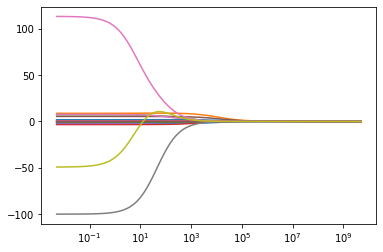

In [351]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

## tahmin

In [352]:
ridge_model

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [353]:
y_pred = ridge_model.predict(X_train)

In [354]:
y_pred [0:10]

array([ 377.43897818,  802.20172846,  495.61262179,  112.53310635,
        426.2235674 , 1004.23269616,  154.7234935 ,  362.55653134,
        485.36598379,  918.70526984])

In [355]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [356]:
# train hatasi
RMSE = np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

289.3292830531484

In [357]:
#croos val. ile hata hesaplama
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10,scoring= 'neg_mean_squared_error')))

351.8239478850038

In [358]:
#test hatasi
y_pred = ridge_model.predict(X_test)

In [359]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

357.05179222828434

### model tuning

In [360]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8082905730238

In [361]:
lambdalar1 = np.random.randint(0,1000,1000)
lambdalar2 = lambdalar

In [362]:
ridgecv = RidgeCV(alphas= lambdalar1, scoring = "neg_mean_squared_error",cv=10, normalize= True )
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([307, 865,   9, 722,  25, 257, 195, 659, 424, 763, 691, 106, 606,
       382, 272, 847, 286, 855,  96, 135, 854, 927,  92, 509, 901, 189,
       427, 322, 389, 313, 728, 600, 913, 118, 707, 530,  88, 238, 107,
       988, 101, 356, 895, 675, 951, 561, 987, 486, 648, 831, 122,   6,
       977,  88, 882, 269, 562, 251, 693,  47, 928, 603, 119, 603, 462,
       619, 162, 505, 248, 790, 719, 153, 818, 766, 427, 809, 408, 503,
       499,   2, 555, 786, 220, 721,  26, 4...
       286,  55, 964, 254, 821, 764, 691, 140, 362, 756, 941, 832,  34,
       677, 466, 831, 392, 546, 858, 882, 205, 934, 722, 982, 891,  59,
       690, 145,   6,  59, 456, 697,  88, 303, 539, 505, 101, 928, 717,
       718, 464, 318, 338, 166, 221, 860, 271, 438, 967,  67, 632, 375,
       353, 854,  84, 761, 637, 713,  86, 971, 715, 996, 867, 187]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [363]:
#optimum parametre
ridgecv.alpha_

2

In [364]:
#final modeli
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train,y_train)

In [365]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.8082905730238

In [366]:
dir(ridgecv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'alpha_',
 'alphas',
 'coef_',
 'cv',
 'fit',
 'fit_intercept',
 'gcv_mode',
 'get_params',
 'intercept_',
 'normalize',
 'predict',
 'score',
 'scoring',
 'set_params',
 'store_cv_values']

# LASSO

In [367]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\ezgig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


In [368]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [369]:
lasso_model.intercept_

-5.587450677336733

In [370]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [371]:
#farkli lambda degerlerine karsilik katsayilar

In [372]:
lasso = Lasso()
coefs = []
alphas = np.random.randint(0,10000,10)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    

C:\Users\ezgig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5512.818991232663, tolerance: 3898.686956380658
  positive)


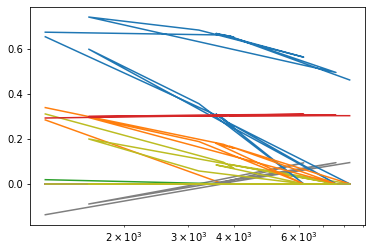

In [373]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

# tahmin

In [374]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [375]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [376]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [377]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

356.0975884554033

In [378]:
r2_score(y_test, y_pred)

0.4142279813236619

# model tunning

In [379]:
alphas = 10**np.linspace(10,-2, 100)*0.5

In [380]:
lasso_cv_model = LassoCV(alphas = alphas , cv=10, max_iter=100000).fit(X_train, y_train)

In [381]:
lasso_cv_model.alpha_

201.85086292982749

In [382]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)
#lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [383]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

363.6832708037446

In [384]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)
#sifir olan katsayilar anlamsiz olan degiskenler, maasa olan etkisi sifir

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet 

In [385]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\ezgig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


In [386]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [387]:
enet_model.intercept_

-6.465955602113127

In [388]:
#tahmin 
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [389]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [390]:
y_pred = enet_model.predict(X_test)

In [391]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [392]:
r2_score(y_test, y_pred)

0.41070222469326945

### model tuning

In [393]:
enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train)

In [394]:
enet_cv_model.alpha_

5230.7647364798695

In [395]:
enet_cv_model.intercept_

-38.5194055839429

In [396]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [ ]:
#final modeli

In [397]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_train,y_train)

In [398]:
y_pred = enet_tuned.predict(X_test)

In [399]:
np.sqrt(mean_squared_error(y_test,y_pred))

394.15280563218795

In [400]:
?ElasticNet